## Type Annotation

In [23]:
import typing
from typing import TypedDict, Union, Optional, Any

### TypeDict

In [39]:
class Movie(TypedDict):
    name: int
    year: str

movie = Movie(name = 'test', year = 123)
print(type(movie['name']))
print(type(movie['year']))

<class 'str'>
<class 'int'>


### Union

In [ ]:
def test(x: Union[int]):
    x = x+2
    return x

print(test(5.125)) ## Should error in langchain
try: 
    print(test("test")) ## Should error from incompatible
except: 
    print("Error")

7.125
Error


### Optional

In [ ]:
def test2(x: Optional[str]):
    x = x+2
    return x

test2(x = 5) ## Should error in langchain

7

### Any

In [52]:
def test2(x: Any):
    x = x+2
    return x

test2(x = 5)

7

### Lambda

In [63]:
def sqaure(x):
    x = -x**2
    x += 123
    if x > 100:
        x = x -50
    else:
        pass
    return x

x = [1,2,3,40]
sqaure = list(map(lambda x: sqaure(x),x))

sqaure

[72, 69, 64, -1477]

## Elements
1. State: Saving the environment in that time 
2. Nodes: To process somthing (Part of graph)
3. Edges: To link the process between Node (Normal, Condition) (Part of graph)
4. Graph: Nodes + Edges
5. Runnable: Execute component in graph
6. Tools: For using in nodes

## Message
1. Human: Input user
2. AI: Response from AI
3. System: Prompt for AI
4. Tool: Prompt for tool
5. Function: Result of function call

## Example

### Graph 1

#### Example

In [66]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [75]:
class AgentState(TypedDict): # State schema
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state["message"] = "Hey " + state["message"] + ", how is your day going?"

    return state

In [76]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

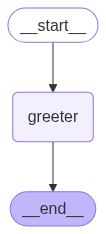

In [77]:
from IPython.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

In [78]:
result = app.invoke({"message": "Bob"})

result

{'message': 'Hey Bob, how is your day going?'}

#### Exercise

In [133]:
class AgentState(TypedDict): #Don't forgot dict type
    name: str
    message: str

def hello_message(state: AgentState) -> AgentState:
    """Hello message for the specific input name"""
    state["message"] = f"""{state["name"]}, you're doing greate today""" #Class attribute as dict

    return state

In [134]:
graph = StateGraph(AgentState)

graph.add_node("hello_node", hello_message)

graph.set_entry_point("hello_node")
graph.set_finish_point("hello_node")

app = graph.compile()

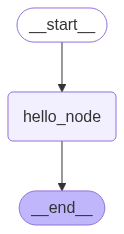

In [135]:
from IPython.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

In [136]:
result = app.invoke({"name": "Bob"})

result

{'name': 'Bob', 'message': "Bob, you're doing greate today"}

### Graph 2

#### Example

In [153]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [154]:
class AgentState(TypedDict):
    values : List[int]
    name: str
    result : str

In [155]:
def process_value(state: AgentState) -> AgentState:
    """This function is to multiple different inputs"""
    print(state)
    state['result'] = f"Hi mister {state['name']}"
    state['result'] += f"\n Your sum is {sum(state["values"])}"
    print(state)
    return state

In [156]:
cal_graph = StateGraph(AgentState)

cal_graph.add_node("calculate_node", process_value)

cal_graph.set_entry_point("calculate_node")
cal_graph.set_finish_point("calculate_node")

cal_app = cal_graph.compile()

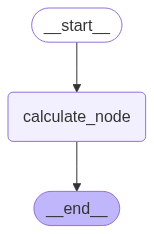

In [157]:
from IPython.display import Image
display(Image(cal_app.get_graph().draw_mermaid_png()))

In [158]:
result = cal_app.invoke({
                  "values": [1,2,3],
                  "name":"Bob",
                  "result":"WTF"})

result

{'values': [1, 2, 3], 'name': 'Bob', 'result': 'WTF'}
{'values': [1, 2, 3], 'name': 'Bob', 'result': 'Hi mister Bob\n Your sum is 6'}


{'values': [1, 2, 3], 'name': 'Bob', 'result': 'Hi mister Bob\n Your sum is 6'}